### evaluate

In [2]:
from stable_baselines3 import PPO
from geneEnv import geneEnv
from pig import pig


modelName = "TwoDise"
model = PPO.load("result\\"+modelName+"\\trained_model.zip")

with open("result\\"+modelName+"\\pigInfo.txt", "r") as f:
    code = f.read()
# 읽어온 코드 실행
exec(code)
print("Evaluating")
#env = model.get_env()
env = geneEnv(2,32,80)
#model.set_env(env)


#check_env(env)

test = []
for tt in range(5):
    obs, _ = env.reset()
    done = False

    reward_list = []
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _, info = env.step(action)
        reward_list.append(reward)
        #print(obs)

    print(sum(reward_list)/len(reward_list))
    test.append(sum(reward_list)/len(reward_list))
    
print(sum(test)/len(test))

Gene Environment setting success
Evaluating
63.725
63.6
63.6875
63.2125
63.5375
63.552499999999995


In [7]:
from stable_baselines3 import PPO
from geneEnv import geneEnv
from pig import pig


modelName = "TwoDiseInverse"
model = PPO.load("result\\"+modelName+"\\trained_model.zip")

with open("result\\"+modelName+"\\pigInfo.txt", "r") as f:
    code = f.read()
# 읽어온 코드 실행
exec(code)
print("Evaluating")
#env = model.get_env()
env = geneEnv(2,32,80)
#model.set_env(env)


#check_env(env)

test = []
for tt in range(5):
    obs, _ = env.reset()
    done = False

    reward_list = []
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _, info = env.step(action)
        reward_list.append(reward)
        #print(obs)

    print(sum(reward_list)/len(reward_list))
    test.append(sum(reward_list)/len(reward_list))
    
print(sum(test)/len(test))

Gene Environment setting success
Evaluating
63.7
63.7125
63.675
64.0
63.325
63.68249999999999


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(reward_list,'r')
plt.grid(True)
plt.show()

# plotting

In [10]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/TwoDise/'

f1 = open(folderPath+'monitor1.csv','r',encoding='UTF8')
f11 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
g = csv.reader(f11,delimiter=',')
next(f)
next(f)
next(f)
next(g)
next(g)
next(g)

rewards_dise = []
for row in f:
    rewards_dise.append(float(row[0]))
for row in g:
    rewards_dise.append(float(row[0]))
    
    
edited_rewards_dise = []
for i in range(0,len(rewards_dise)-1000,1000):
    edited_rewards_dise.append(sum(rewards_dise[i:i+1000])/1000)





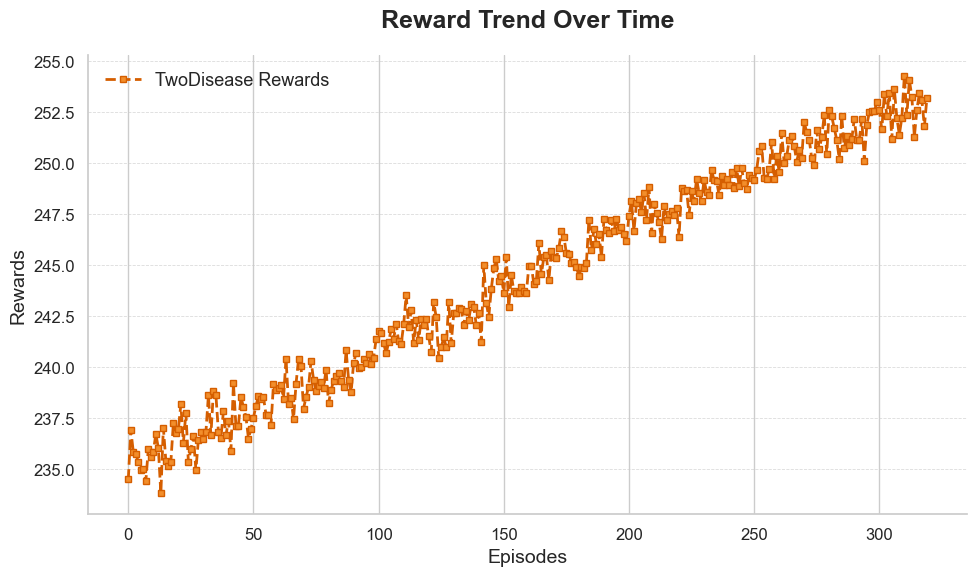

In [11]:
# Seaborn 스타일 설정 (모던하고 깔끔한 스타일로 설정)
sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})
plt.figure(figsize=(10, 6))
plt.plot(edited_rewards_dise, color="#D55E00", label='TwoDisease Rewards', linestyle='--', marker='s', markersize=4, markerfacecolor="#F28E2B")
plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Rewards', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
plt.legend(loc='best', frameon=False, fontsize=13)
sns.despine()
plt.tight_layout()

# 그래프 출력
plt.show()

In [12]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/TwoDiseInverse/'

f1 = open(folderPath+'monitor1.csv','r',encoding='UTF8')
f11 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
g = csv.reader(f11,delimiter=',')
next(f)
next(f)
next(f)
next(g)
next(g)
next(g)

rewards_inv = []
for row in f:
    rewards_inv.append(float(row[0]))
for row in g:
    rewards_inv.append(float(row[0]))
    
    
edited_rewards_inv = []
for i in range(0,len(rewards_inv)-1000,1000):
    edited_rewards_inv.append(sum(rewards_inv[i:i+1000])/1000)





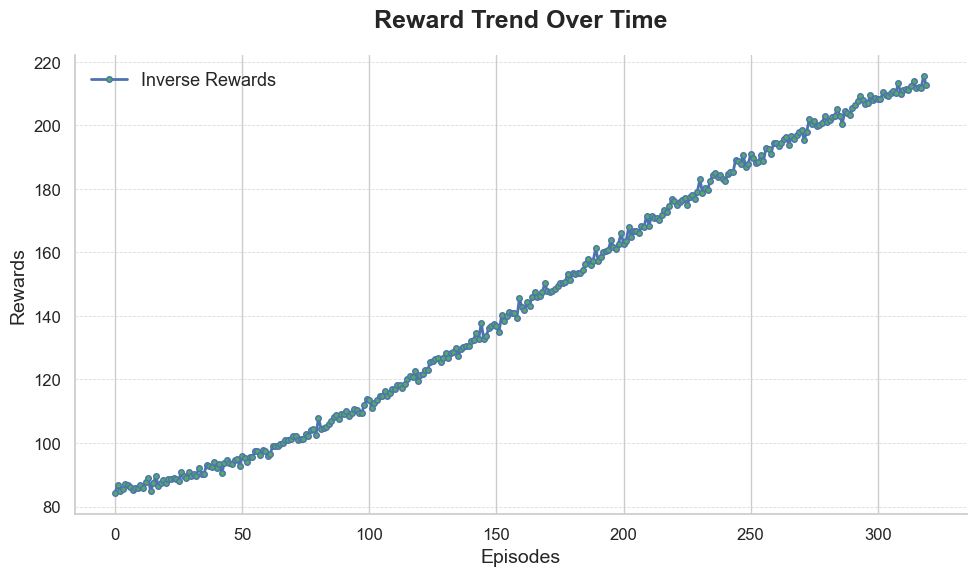

In [13]:
sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})
plt.figure(figsize=(10, 6))
plt.plot(edited_rewards_inv, color="#4C72B0", label='Inverse Rewards', linestyle='-', marker='o', markersize=4, markerfacecolor="#55A868")
plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Rewards', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
plt.legend(loc='best', frameon=False, fontsize=13)
sns.despine()
plt.tight_layout()

plt.show()

In [14]:
diseStart = sum(edited_rewards_dise[:10])/len(edited_rewards_dise[:10])
diseEnd = sum(edited_rewards_dise[-10:])/len(edited_rewards_dise[-10:])
invStart = sum(edited_rewards_inv[:10])/len(edited_rewards_inv[:10])
invEnd = sum(edited_rewards_inv[-10:])/len(edited_rewards_inv[-10:])

print(f"dise start : {diseStart:.3f}")
print(f"dise end : {diseEnd:.3f}")
print(f"inv start : {invStart:.3f}")
print(f"inv end : {invEnd:.3f}")


dise start : 235.428
dise end : 252.914
inv start : 85.754
inv end : 212.358


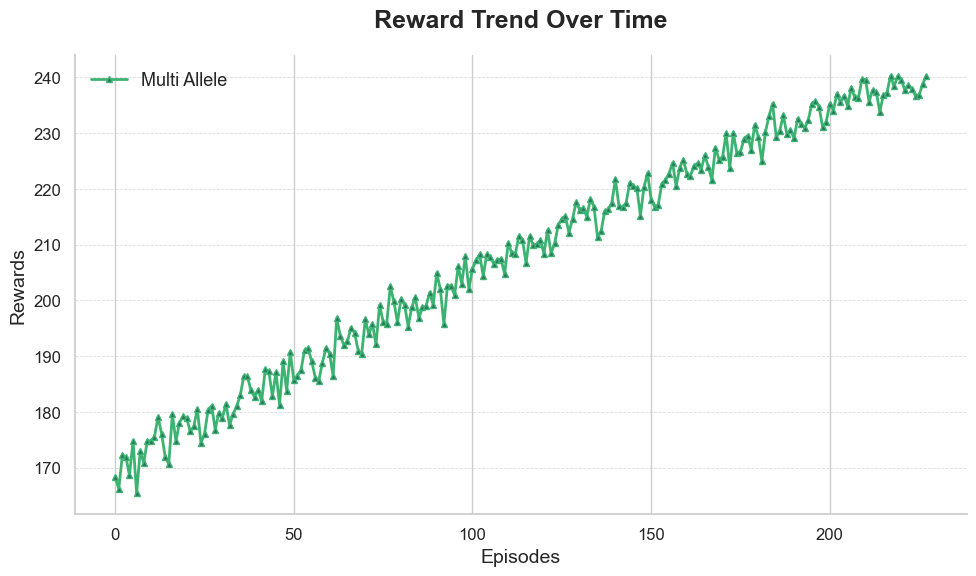

In [15]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/MultiAlle/'

f1 = open(folderPath+'monitor1.csv','r',encoding='UTF8')
f11 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
g = csv.reader(f11,delimiter=',')
next(f)
next(f)
next(f)
next(g)
next(g)
next(g)

rewards_multi = []
for row in f:
    rewards_multi.append(float(row[0]))
for row in g:
    rewards_multi.append(float(row[0]))
    
    
edited_rewards_multi = []
for i in range(0,len(rewards_multi)-500,500):
    edited_rewards_multi.append(sum(rewards_multi[i:i+500])/500)



sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})
plt.figure(figsize=(10, 6))
plt.plot(edited_rewards_multi, color="#3CB371", label='Multi Allele', linestyle='-', marker='^', markersize=4, markerfacecolor="#2B7260")
plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Rewards', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
plt.legend(loc='best', frameon=False, fontsize=13)
sns.despine()
plt.tight_layout()

plt.show()

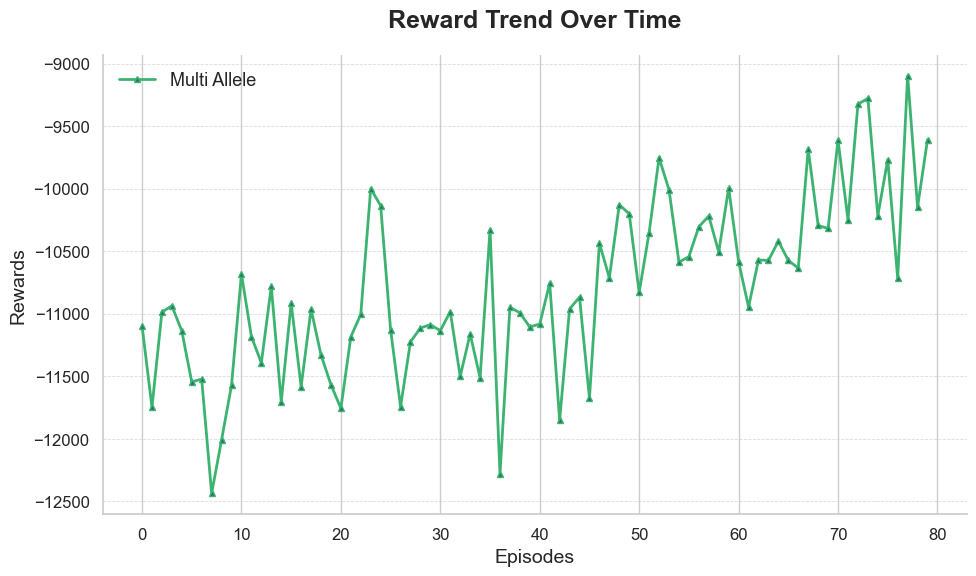

In [ ]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/MediFlower2-2/'

f1 = open(folderPath+'monitor1.csv','r',encoding='UTF8')
f11 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
g = csv.reader(f11,delimiter=',')
next(f)
next(f)
next(f)
next(g)
next(g)
next(g)

rewards_medi = []
for row in f:
    rewards_medi.append(float(row[0]))
for row in g:
    rewards_medi.append(float(row[0]))
    
    
edited_rewards_medi = []
for i in range(0,len(rewards_medi)-500,500):
    edited_rewards_medi.append(sum(rewards_medi[i:i+500])/500)



sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})
plt.figure(figsize=(10, 6))
plt.plot(edited_rewards_medi, color="#3CB371", label='Multi Allele', linestyle='-', marker='^', markersize=4, markerfacecolor="#2B7260")
plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Rewards', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
plt.legend(loc='best', frameon=False, fontsize=13)
sns.despine()
plt.tight_layout()

plt.show()